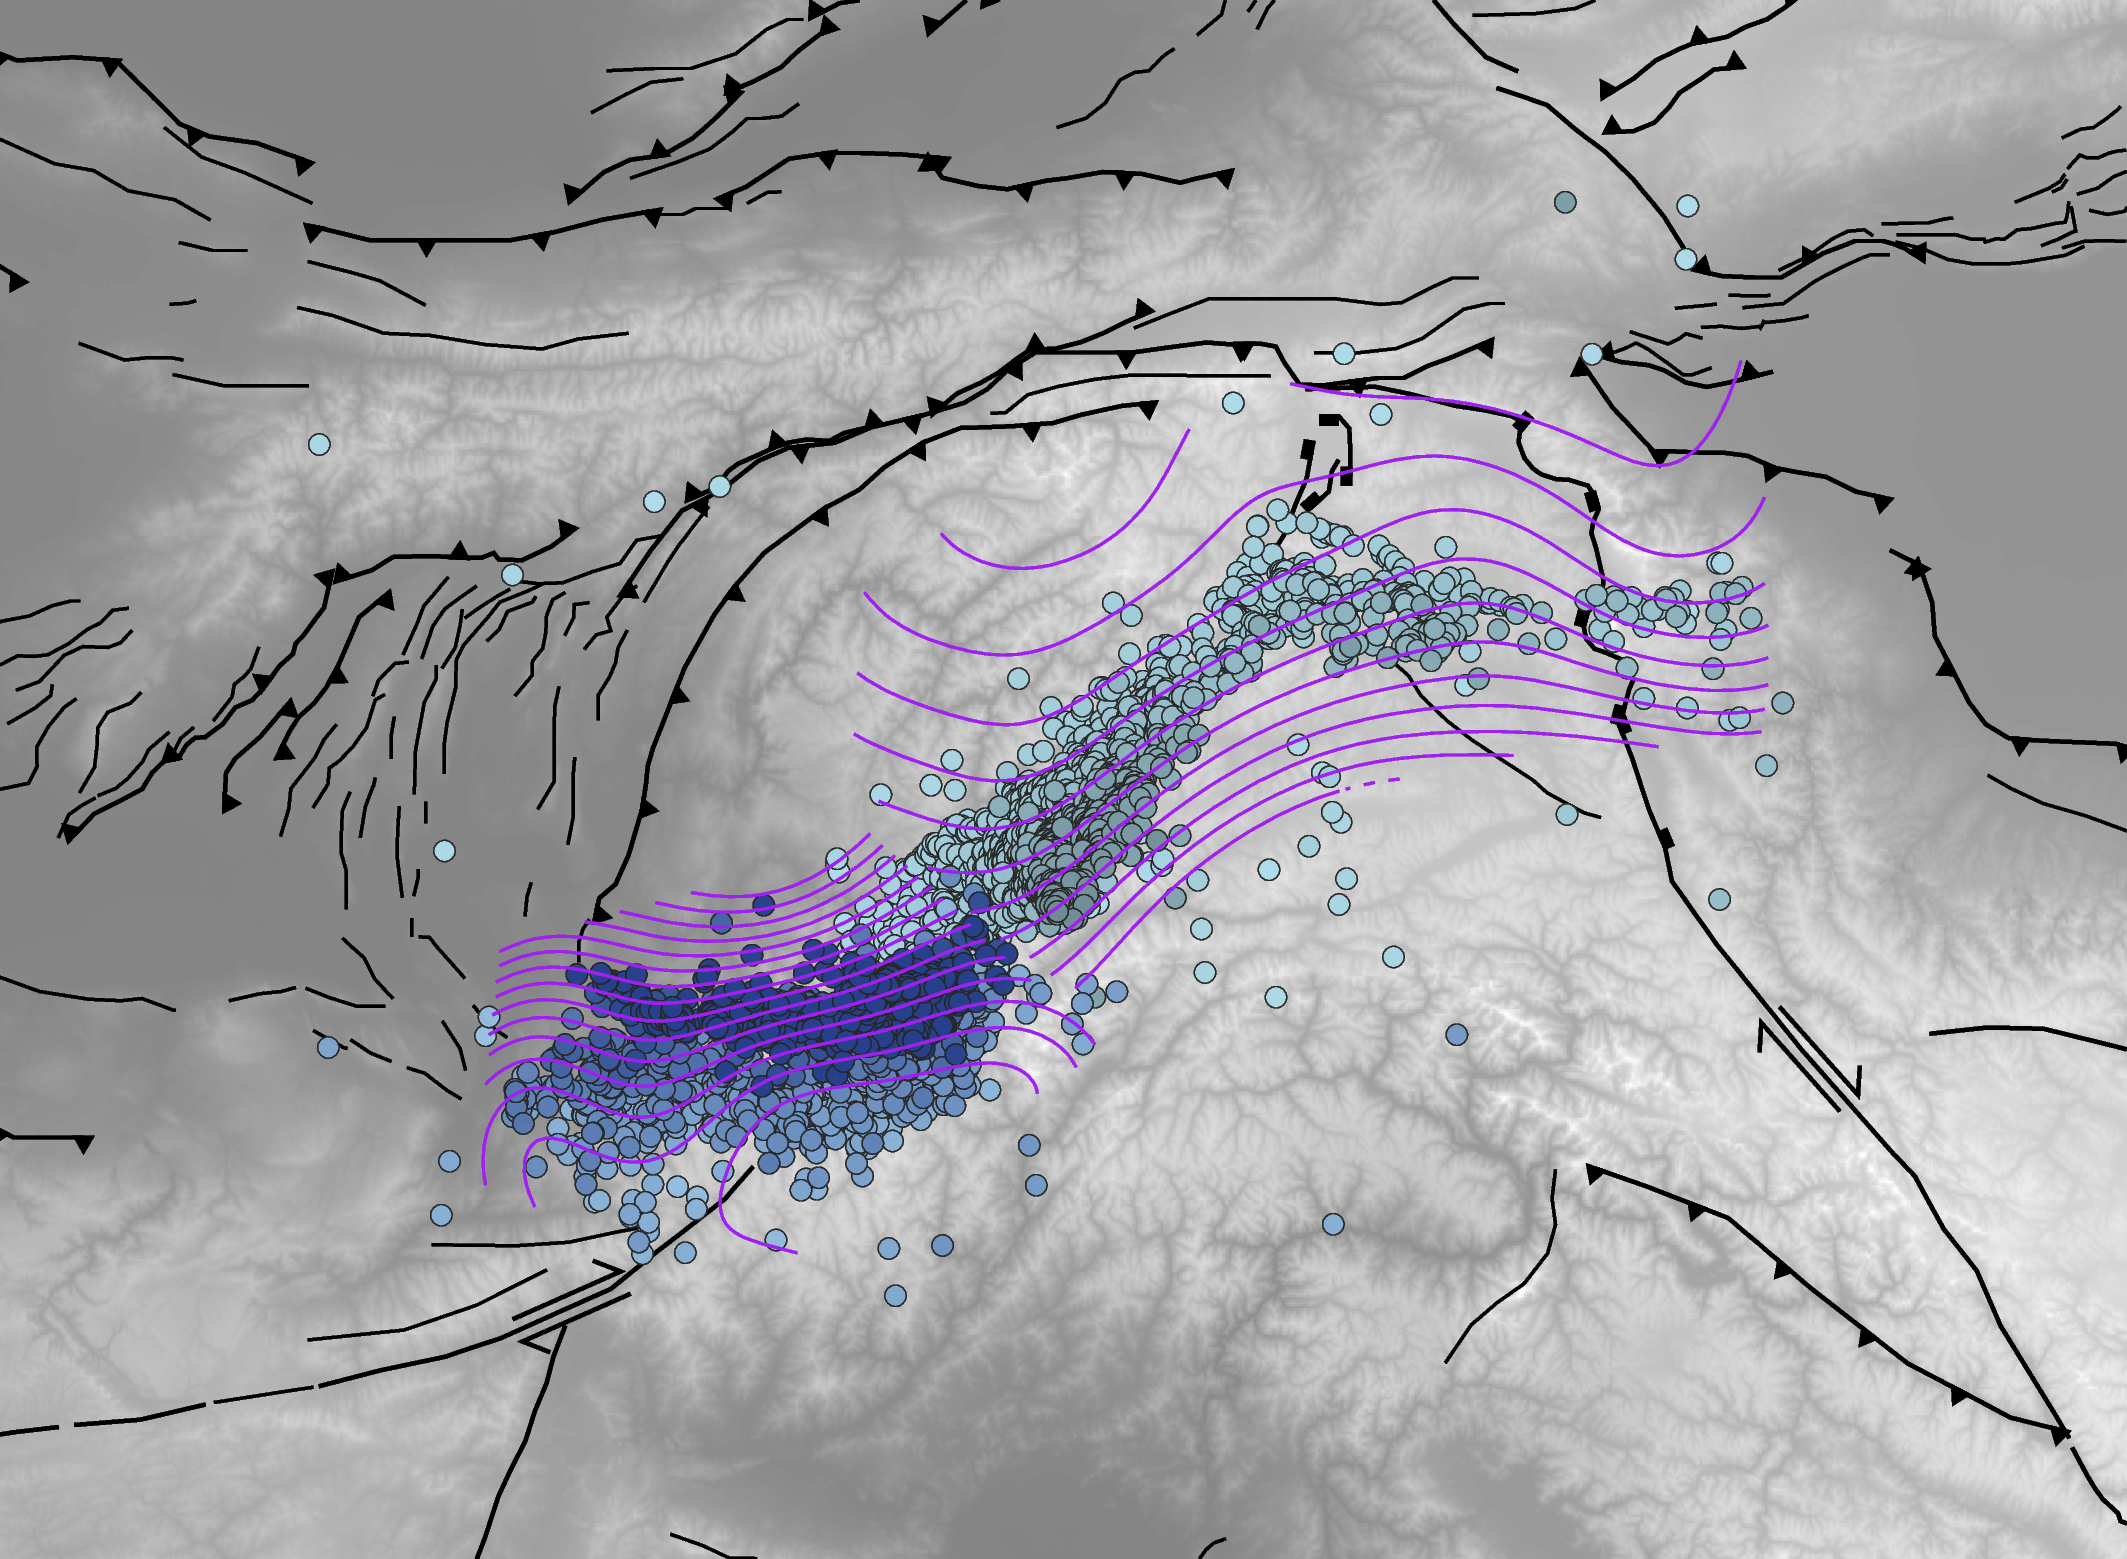

In [2]:
import pygmt

### GMT basemap ###

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)


fig = pygmt.Figure()
# pygmt.config(MAP_FRAME_TYPE="plain") # figure config (borders)
fig.coast(region=region,\
          projection="M%s/%s/%s%s" % (centerlon, urcrnrlat, proj_scale_w, proj_scale_unit),\
          water="white", land="grey", shorelines="1/0.5p")

          # Mercator
          # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

fig.grdimage(grid=grid, cmap="bin/cpt/seabluelandgrey.cpt")
# fig.grdimage(grid=grid, cmap="geo")


## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults
fig.plot(data="bin/faults/normal.gmt", style="f1c/0.13c+l+b", pen=f"0.95p,black", fill="black") # normal
fig.plot(data="bin/faults/thrust.gmt", style="f1c/0.13c+l+t", pen=f"0.95p,black", fill="black") # thrust
fig.plot(data="bin/faults/dextral.gmt", style="f5c/1c+r+s45+o2.25c", pen=f"0.95p,black", fill="black") # dextral (right)
fig.plot(data="bin/faults/sinistral.gmt", style="f5c/1c+l+s45+o2.25c", pen=f"0.95p,black", fill="black") # sinistral (left)


## plotting intermediate depth earthquakes from Kufner et al. (2017)
fig.plot(data="bin/Kufneretal2017_Pamir.txt", style="c0.18c", pen="thinnest,gray15,solid", cmap="bin/cpt/lightblue.cpt", transparency=2)
fig.plot(data="bin/Kufneretal2017_HinduKush.txt", style="c0.18c", pen="thinnest,gray15,solid", cmap="bin/cpt/blue.cpt", transparency=2)

## plot slab2.0 here
fig.plot(data="bin/hin_slab2_dep_02.24.18_contours.in", pen=f"0.65p,purple") # Hindu Kush, bounding coords 66 74 40 34
fig.plot(data="bin/pam_slab2_dep_02.26.18_contours.in", pen=f"0.65p,purple") # Pamir, bounding coords 68 78 41 35



fig.show()
fig.savefig("test.png")

In [34]:
import IntPyGMT
from IntPyGMT import IntPyGMT_overlay

%matplotlib inline
%matplotlib widget

In [36]:
grid_freq = 2
IntPyGMT_overlay("test.png", llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, grid_freq)

TypeError: 'module' object is not callable